In [1]:
import pandas as pd

df = pd.read_csv("Fraud_Detection_Sample_Dataset.csv")
df.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,103,PAYMENT,1014.71,46409.74,23892.53,19475.85,69947.48,0,0
1,436,CASH_OUT,3193.48,29756.49,74837.96,66526.52,67073.08,0,0
2,271,DEBIT,2322.72,8900.28,69129.13,97969.96,22371.23,0,0
3,107,DEBIT,2873.97,90516.29,32959.43,32082.01,31089.30,0,0
4,72,TRANSFER,53.25,89396.77,63341.76,26819.82,71034.41,0,0


In [2]:
df.shape
df.info()
df['isFraud'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   oldbalanceOrg   50000 non-null  float64
 4   newbalanceOrig  50000 non-null  float64
 5   oldbalanceDest  50000 non-null  float64
 6   newbalanceDest  50000 non-null  float64
 7   isFraud         50000 non-null  int64  
 8   isFlaggedFraud  50000 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 3.4+ MB


isFraud
0    49959
1       41
Name: count, dtype: int64

In [3]:
df.isnull().sum()


step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
list(df.columns)


['step',
 'type',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [6]:
df.drop('isFlaggedFraud', axis=1, inplace=True)


In [7]:
import numpy as np
df['amount'] = np.log1p(df['amount'])


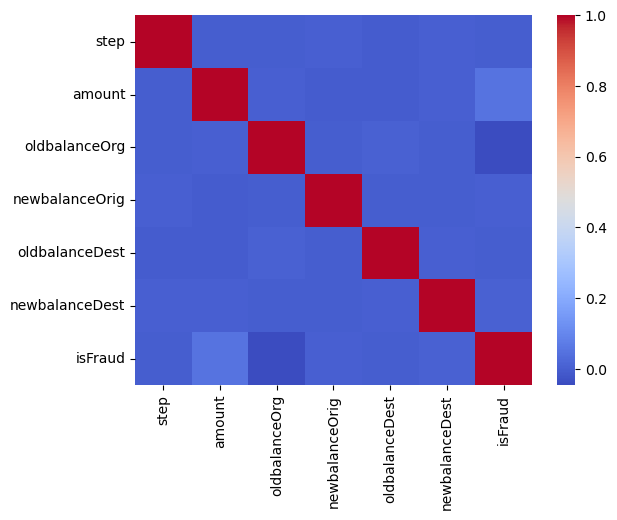

In [9]:
corr = df.select_dtypes(include='number').corr()

sns.heatmap(corr, cmap='coolwarm')
plt.show()


In [15]:
df.columns


Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

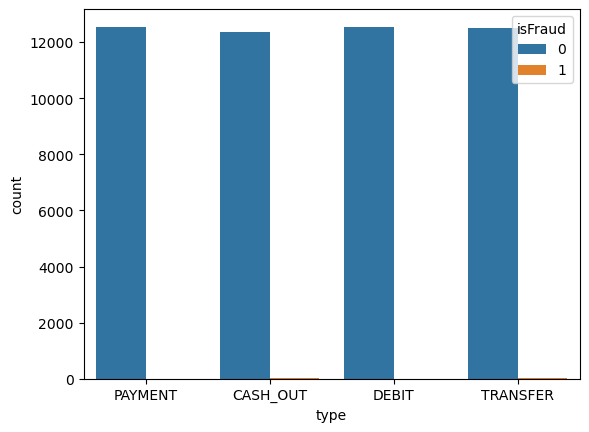

In [16]:
df_eda = pd.read_csv("Fraud_Detection_Sample_Dataset.csv")

sns.countplot(x='type', hue='isFraud', data=df_eda)
plt.show()


In [17]:
features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']
target = 'isFraud'


In [19]:
if 'isFlaggedFraud' in df.columns:
    df.drop('isFlaggedFraud', axis=1, inplace=True)


In [20]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']


In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [24]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10079
           1       1.00      1.00      1.00      9905

    accuracy                           1.00     19984
   macro avg       1.00      1.00      1.00     19984
weighted avg       1.00      1.00      1.00     19984

ROC-AUC: 0.9999214784725153


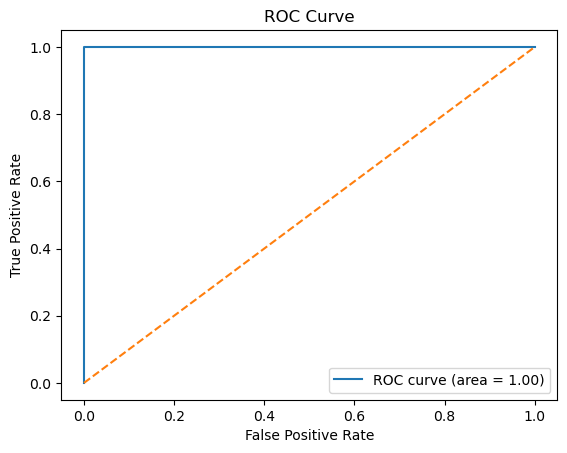

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [27]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head()


,Feature,Coefficient
1,amount,15.488929
8,type_TRANSFER,2.201977
5,newbalanceDest,0.000004
4,oldbalanceDest,-0.000006
3,newbalanceOrig,-0.000007


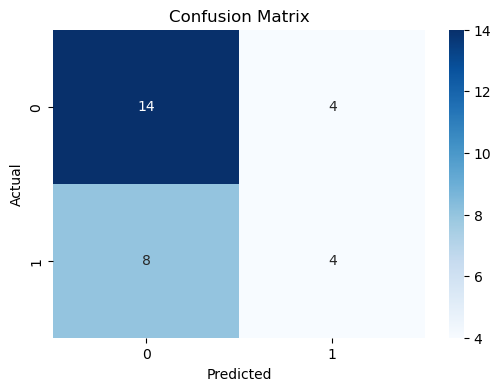

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create some sample data (replace this with your actual data)
X = np.random.rand(100, 4)  # Features
y = np.random.randint(0, 2, 100)  # Binary target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model (Random Forest in this example)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot it nicely
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

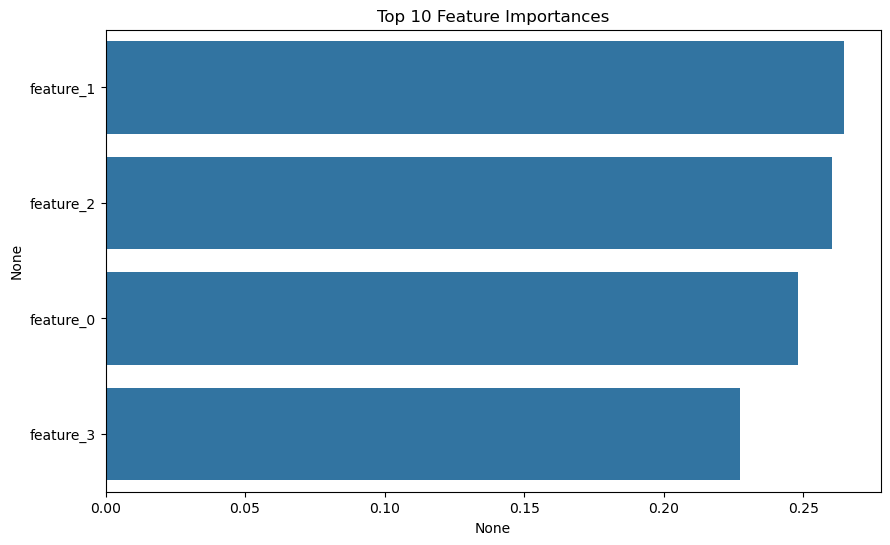

In [9]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
importances = rf_model.feature_importances_
if isinstance(X_train, np.ndarray):
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])] 
else:
    feature_names = X_train.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10]) 
plt.title("Top 10 Feature Importances")
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
import joblib
joblib.dump(rf_model, "rf_fraud_model.pkl")

['rf_fraud_model.pkl']